In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15,5]

In [2]:
print("\U0001F602")

😂


In [3]:
np.random.seed(0)

In [4]:
# implementing y = mx+c
m = 0.3
b = 2
off = 0.2
x = np.arange(0,10,0.1)
y = m*x + b + np.random.normal(-off,off,len(x))

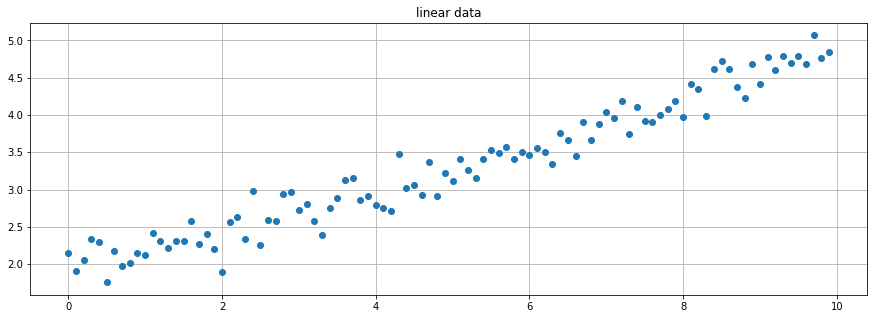

In [5]:
plt.plot(x,y,'o')
plt.grid()
plt.title('linear data')
plt.show()

In [6]:
alpha = 0.05
epoch = 1000
theta0 = np.random.uniform()
theta1 = np.random.uniform()

In [7]:
costData = []
for ii in range(epoch):
    h = theta1*x+theta0                          # model fit
    diff = h-y
    cost = np.sum(np.square(diff))/(2*len(x))    # cost computation 
    costData.append(cost)
    theta0 = theta0 - alpha*np.sum(diff)/len(x)
    theta1 = theta1 - alpha*np.sum(np.dot(diff,x))/len(x)
    
print('slop m = ',theta1)
print('     c = ',theta0)

slop m =  0.29399422220338106
     c =  1.84168885493423


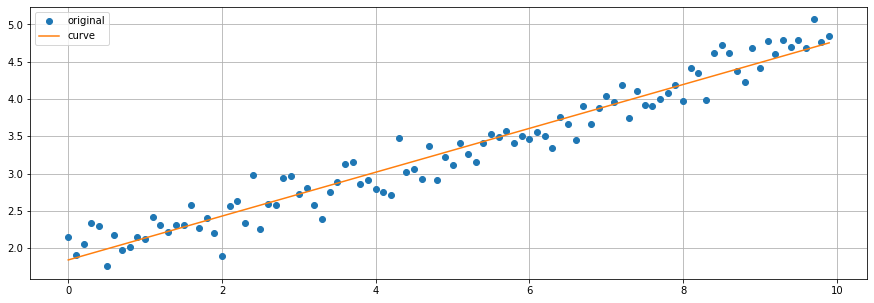

In [8]:
plt.plot(x,y,'o',label='original')
plt.plot(x,theta1*x+theta0,label='curve')
plt.legend()
plt.grid()
plt.show()

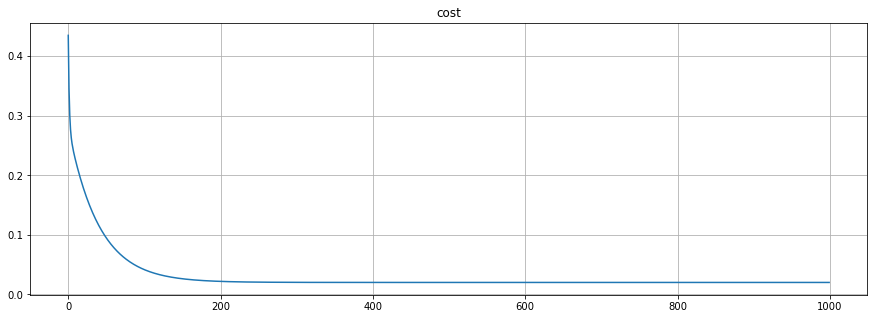

In [9]:
plt.plot(costData)
plt.grid()
plt.title('cost')
plt.show()